In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['font.sans-serif'] = ['Times New Roman'] 
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams['font.size'] =10 

In [42]:
#read files
if os.path.isfile("data1.xlsx"):
    filepath = "data1.xlsx"
    print("loading from file")
else:
    filepath = "https://www.abs.gov.au/statistics/people/population/regional-population-age-and-sex/latest-release#data-downloads"
    print("loading from the internet")

df_male   = pd.read_excel(r'C:\Users\Lenovo\1161\me\data_introduction\data1.xlsx',sheet_name = 'Table 1',header=8)
df_female = pd.read_excel(r'C:\Users\Lenovo\1161\me\data_introduction\data1.xlsx',sheet_name = 'Table 2',header=8)
df_person = pd.read_excel(r'C:\Users\Lenovo\1161\me\data_introduction\data1.xlsx',sheet_name = 'Table 3',header=8)


penalty_data = pd.read_excel(filepath)
print("done")



loading from file
done


In [43]:
# Population of different age groups in 2021
df1 = pd.concat([df_male[df_male['Year']==2021][df_male.columns[5:23]].sum(),
                df_female[df_female['Year']==2021][df_female.columns[5:23]].sum(),
                df_person[df_person['Year']==2021][df_person.columns[5:23]].sum()],axis=1)
df1.columns=['Total males','Total females','Total persons']

In [44]:
df1

,Total males,Total females,Total persons
0-4,776290,733669,1509959
5–9,831593,785181,1616774
10–14,835444,788448,1623892
15–19,762032,717600,1479632
20–24,837110,786274,1623384
25–29,918413,903618,1822031
30–34,940528,959092,1899620
35–39,928244,939143,1867387
40–44,815889,838611,1654500
45–49,817302,832733,1650035


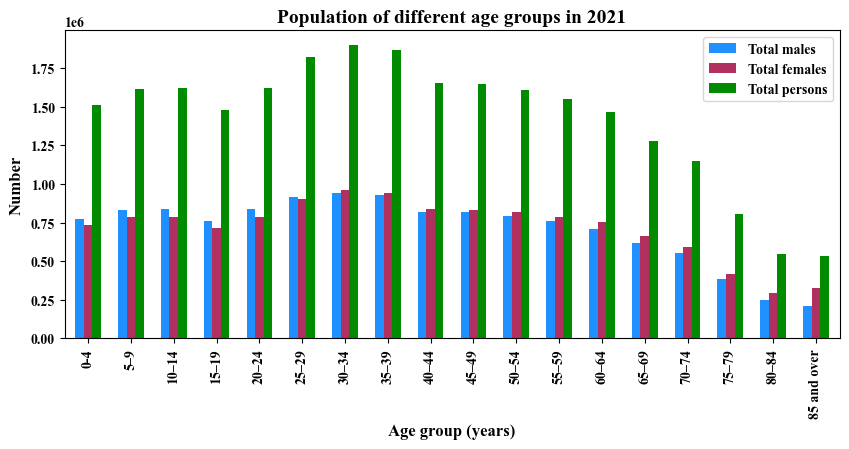

In [45]:
fig,ax = plt.subplots(figsize=(10,4))
df1.plot(kind='bar',ax=ax,width=0.6,color=['#1E90FF','#B03060','#008B00'])
ax.set_xlabel('Age group (years)',fontweight='bold',fontsize=12)
ax.set_ylabel('Number',fontweight='bold',fontsize=12)
ax.set_title('Population of different age groups in 2021',fontweight='bold',fontsize=14)
plt.show()

In [46]:
# Population in different years
df2 = pd.concat([df_male.groupby('Year')['Total males'].sum(),
df_female.groupby('Year')['Total females'].sum(),
df_person.groupby('Year')['Total persons'].sum()],axis=1)

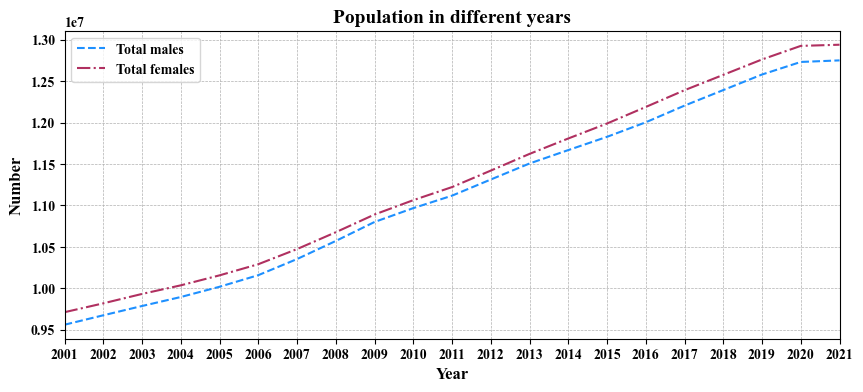

In [47]:

fig,ax = plt.subplots(figsize=(10,4))
df2.iloc[:,:2].plot(style=['--','-.'],ax=ax,color=['#1E90FF','#B03060'])
# ax.set_ylim(ymin=0)
ax.set_xticks(np.arange(2001,2022))
ax.set_xticklabels(np.arange(2001,2022))
ax.set_ylabel('Number',fontweight='bold')
ax.grid(ls='--',lw=0.5)
ax.set_xlim(2001,2021)
ax.set_xlabel('Year',fontweight='bold',fontsize=12)
ax.set_ylabel('Number',fontweight='bold',fontsize=12)
ax.set_title('Population in different years',fontweight='bold',fontsize=14)
plt.show()

In [49]:
# Population in different regions in 2021

df3 = df_person[df_person['Year']==2021].groupby('S/T name')['Total persons'].sum()
df3_data = 2*np.pi*df3.values/sum(df3.values)
df3_cumdata = np.append(0,np.cumsum(df3_data))


In [50]:
np.set_printoptions(suppress=True)
per= np.round(100*df3.values/sum(df3.values),3) #get the proportion of each province

Text(0.5, 1.0, 'Total persons in 2021')

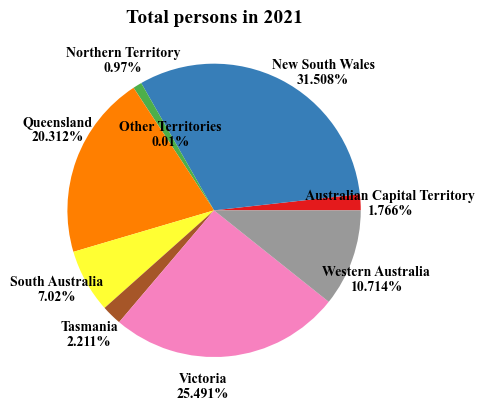

In [51]:
colors = plt.cm.Set1(np.arange(len(df3_cumdata)))
fig,ax = plt.subplots(figsize=(5,4),subplot_kw=dict(projection='polar'))
for i,c in zip(range(len(df3_cumdata)-1),colors):
    ax.bar(df3_cumdata[i],align='edge',height=10,width=df3_data[i],color=c)
for idx,data_ in enumerate(df3_cumdata[:-1]):
    if df3_data[idx]<0.01:
        ax.annotate(xy=(data_,8),xytext=(data_-df3_data[idx-1],6),text=df3.index[idx]+'\n'+str(per[idx])+'%',ha='center',va='center')
    else:ax.annotate(xy=(data_,8),xytext=(data_+0.4*df3_data[idx],12),text=df3.index[idx]+'\n'+str(per[idx])+'%',ha='center',va='center')
ax.set_axis_off()
ax.set_title('Total persons in 2021',fontweight='bold',fontsize=14)

Text(0.5, 1.0, 'Total persons in 2021')

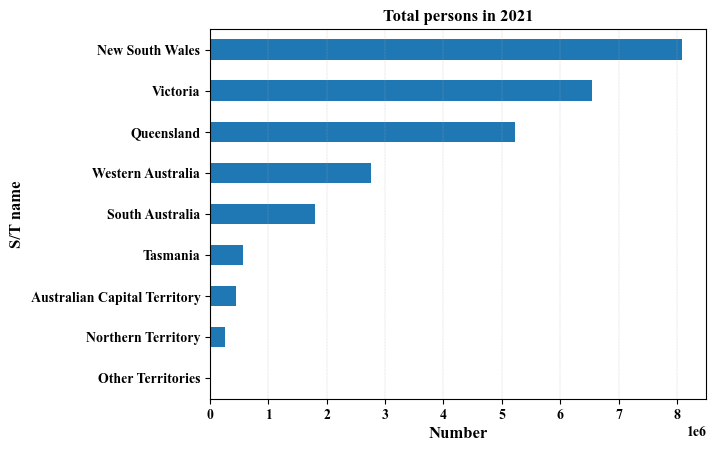

In [52]:
ax = df_person[df_person['Year']==2021].groupby('S/T name')['Total persons'].sum().sort_values().plot(kind='barh')
ax.set_ylabel('S/T name',fontweight='bold',fontsize=12)
ax.set_xlabel('Number',fontweight='bold',fontsize=12)
ax.grid(axis='x',lw=0.2,ls='--')
ax.set_title('Total persons in 2021',fontweight='bold')

In [53]:
# Population in different regions from 2001 to 2021
df5 = df_person.groupby(['Year','S/T name'])['Total persons'].sum().reset_index()
st_ls = df5['S/T name'].unique().tolist()
df5['S/T name'] = df5['S/T name'].apply(lambda x :st_ls.index(x))

In [54]:
df5

,Year,S/T name,Total persons
0,2001,0,321538
1,2001,1,6530349
2,2001,2,201743
3,2001,3,542
4,2001,4,3571469
...,...,...,...
184,2021,4,5217653
185,2021,5,1803192
186,2021,6,567909
187,2021,7,6548040


Text(0.5, 1.0, 'Population in different regions from 2001 to 2021')

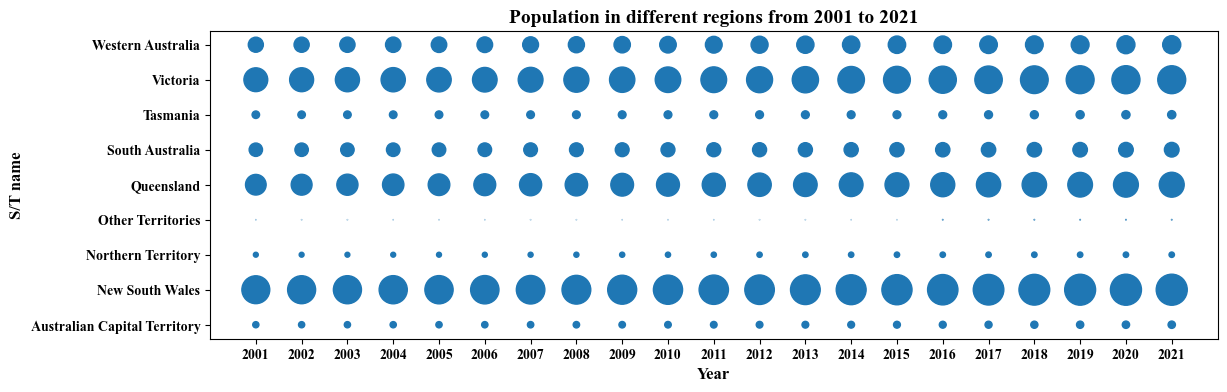

In [55]:
fig,ax = plt.subplots(figsize=(13,4))
ax.scatter(df5['Year'],df5['S/T name'],s=df5['Total persons']*500/max(df5['Total persons']))
ax.set_xticks(np.arange(2001,2022))
ax.set_yticks(np.arange(len(st_ls)))
ax.set_yticklabels(st_ls)
ax.set_xlabel('Year',fontweight='bold',fontsize=12)
ax.set_ylabel('S/T name',fontweight='bold',fontsize=12)
ax.set_title('Population in different regions from 2001 to 2021',fontweight='bold',fontsize=14)

In [56]:
import geopandas as gpd

In [57]:
map_df = gpd.read_file(r'C:\Users\Lenovo\1161\me\data_introduction\LGA_2018_AUST.shp')

In [58]:
#show  LGA_2018_AUST.shp
map_df

,LGA_CODE18,LGA_NAME18,STE_CODE16,STE_NAME16,AREASQKM18,geometry
0,10050,Albury (C),1,New South Wales,305.9459,"POLYGON ((146.82130 -36.04997, 146.82138 -36.0..."
1,10130,Armidale Regional (A),1,New South Wales,8620.6990,"POLYGON ((151.32425 -30.26923, 151.32419 -30.2..."
2,10250,Ballina (A),1,New South Wales,484.9389,"MULTIPOLYGON (((153.57094 -28.87390, 153.57097..."
3,10300,Balranald (A),1,New South Wales,21690.6753,"POLYGON ((143.00432 -33.78165, 143.01538 -33.7..."
4,10470,Bathurst Regional (A),1,New South Wales,3817.8646,"POLYGON ((149.90753 -33.39968, 149.90717 -33.4..."
...,...,...,...,...,...,...
557,89499,No usual address (ACT),8,Australian Capital Territory,0.0000,None
558,89799,Migratory - Offshore - Shipping (ACT),8,Australian Capital Territory,0.0000,None
559,99399,Unincorp. Other Territories,9,Other Territories,256.3162,"MULTIPOLYGON (((167.96327 -29.07217, 167.96325..."
560,99499,No usual address (OT),9,Other Territories,0.0000,None


In [59]:
map_lga = map_df['LGA_CODE18'].unique().tolist() #Extract LGA_CODE18
per_lga = df_person['LGA code'].astype(str).unique().tolist() #Extract LGA code in  'df_person'
comb_lga = list(set(per_lga)& set(map_lga)) 

In [60]:
map_df.set_index('LGA_CODE18',inplace=True) # set LGA_CODE18 to index
map_df = map_df.loc[comb_lga] 

In [61]:
map_df

,LGA_NAME18,STE_CODE16,STE_NAME16,AREASQKM18,geometry
LGA_CODE18,,,,,
50630,Boddington (S),5,Western Australia,1904.4791,"POLYGON ((116.22584 -32.79188, 116.22598 -32.7..."
15800,Narrandera (A),1,New South Wales,4116.3459,"POLYGON ((146.48231 -34.47363, 146.48099 -34.4..."
30370,Banana (S),3,Queensland,28550.1626,"POLYGON ((149.78268 -24.53845, 149.77870 -24.5..."
34770,Mackay (R),3,Queensland,7613.2964,"MULTIPOLYGON (((149.03513 -20.42674, 149.03274..."
57840,South Perth (C),5,Western Australia,19.8116,"POLYGON ((115.84798 -31.98010, 115.84776 -31.9..."
...,...,...,...,...,...
55670,Morawa (S),5,Western Australia,3510.5928,"POLYGON ((115.67144 -29.02452, 115.67123 -29.0..."
21450,Cardinia (S),2,Victoria,1282.5678,"POLYGON ((145.59564 -37.89698, 145.59574 -37.8..."
50910,Brookton (S),5,Western Australia,1601.1532,"POLYGON ((116.53444 -32.37356, 116.53437 -32.3..."


In [62]:
df_person.set_index('LGA code',inplace=True)  # set 'LGA code 'to index

In [63]:
df_per_map = df_person.loc[[int(x) for x in comb_lga]]
df_per_new = df_per_map[df_per_map['Year']==2020]['Total persons']

In [64]:
df_per_new.index.name = 'LGA_CODE18' 

In [65]:
df_per_new.index = comb_lga
per_map = pd.concat([map_df,pd.DataFrame(df_per_new)],axis=1)

In [66]:
per_map

,LGA_NAME18,STE_CODE16,STE_NAME16,AREASQKM18,geometry,Total persons
50630,Boddington (S),5,Western Australia,1904.4791,"POLYGON ((116.22584 -32.79188, 116.22598 -32.7...",1754
15800,Narrandera (A),1,New South Wales,4116.3459,"POLYGON ((146.48231 -34.47363, 146.48099 -34.4...",5775
30370,Banana (S),3,Queensland,28550.1626,"POLYGON ((149.78268 -24.53845, 149.77870 -24.5...",14614
34770,Mackay (R),3,Queensland,7613.2964,"MULTIPOLYGON (((149.03513 -20.42674, 149.03274...",121612
57840,South Perth (C),5,Western Australia,19.8116,"POLYGON ((115.84798 -31.98010, 115.84776 -31.9...",45181
...,...,...,...,...,...,...
55670,Morawa (S),5,Western Australia,3510.5928,"POLYGON ((115.67144 -29.02452, 115.67123 -29.0...",669
21450,Cardinia (S),2,Victoria,1282.5678,"POLYGON ((145.59564 -37.89698, 145.59574 -37.8...",116302
50910,Brookton (S),5,Western Australia,1601.1532,"POLYGON ((116.53444 -32.37356, 116.53437 -32.3...",972
65610,West Coast (M),6,Tasmania,9583.5388,"MULTIPOLYGON (((145.48933 -42.97011, 145.48915...",4359


In [67]:

norm = mpl.colors.LogNorm(vmin=per_map['Total persons'].min(), vmax=per_map['Total persons'].max()) 

Text(496.05453929539306, 0.5, 'Number')

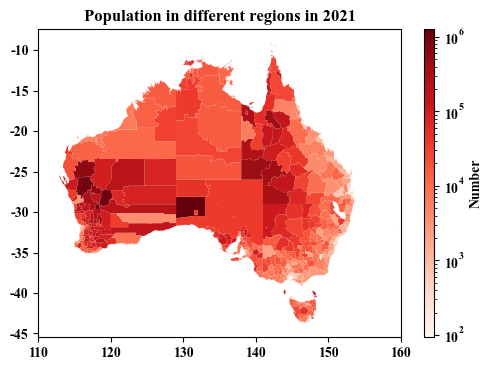

In [68]:
fig,ax = plt.subplots(figsize=(6,4))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="2.5%", pad=0.02)
per_map.plot('Total persons',cmap='Reds_r',vmin=per_map['Total persons'].min(), vmax=per_map['Total persons'].max(),
            norm=norm,ax=ax)
ax.set_xlim(110,160)
ax.set_title('Population in different regions in 2021',fontweight='bold')

sm = plt.cm.ScalarMappable(norm =norm ,cmap='Reds')
cbar = fig.colorbar(sm,ax=ax,cax=cax)
cbar.ax.set_ylabel('Number',fontweight='bold')
